In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from Ising import Lattice

In [91]:
[Ms, Chis, Cs] = np.load('data/higher_dims2.npz')['stats_d'][0]
[M_errs, Chi_errs, C_errs] = np.load('data/higher_dims2.npz')['errs_d'][0]
print(Ms)

[0.68459871 0.66610713 0.64525779 0.62384416 0.59932772 0.56724135
 0.53890134 0.49539042 0.45086021 0.3894447  0.30502014 0.1823292
 0.11138536 0.06529887 0.06232863 0.05009547 0.0445714  0.04525449
 0.03750654 0.03527612]


In [11]:
def power_sing(T, alpha, a):
    return T ** alpha * a

def lin_fit(T, alpha, a):
    return T * alpha + a

def M_exp(T, T_c, beta, a):
    return a * (np.abs(T_c - T) ** (beta)) * (T < T_c)

In [12]:
K = 10
n = 200
ds = [3, 4, 5]
N = 26
T_steps = 20

Ts = np.linspace(4.15, 4.8, T_steps)

# Susceptibility

[-1.31934472  0.28454132]
0.1076813758469741


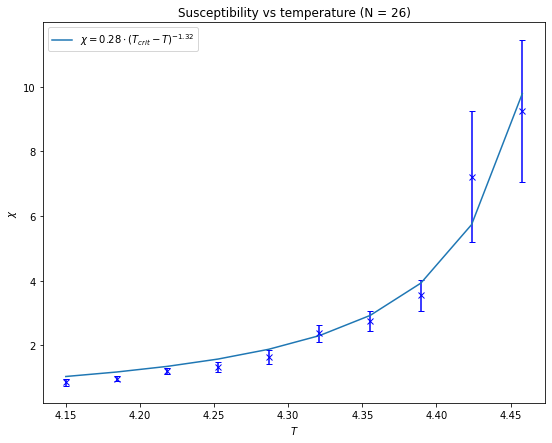

In [89]:
max = np.argmax(Chis)
T_c = Ts[max]
s = slice(0, max-1)
T_range = np.abs(Ts[s] - T_c)
Chi_range = Chis[s]
Chi_err_range = Chi_errs[s]/2

bounds_gamma = ([-3, -5], [0, 20])
fit, fit_err = curve_fit(power_sing, T_range, Chi_range, bounds=bounds_gamma)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(-T_range+T_c, Chi_range, Chi_err_range, capsize=3, fmt='bx')
Chi_pred = power_sing(T_range, gamma, a)
ax.plot(-T_range+T_c, Chi_pred)

ax.set_title("Susceptibility vs temperature ("+ f'{N = }' + ")")
ax.set_xlabel("$T$")
ax.set_ylabel("$\chi$")
fig.set_size_inches(9, 7)
ax.legend(["$\chi = 0.28\cdot(T_{crit} - T)^{-1.32}$"])
plt.savefig(r"Pics/gamma3d.png", format="png", dpi=1200)

# Specific heat

[-0.21269946  1.09440728]
0.022040894669208343


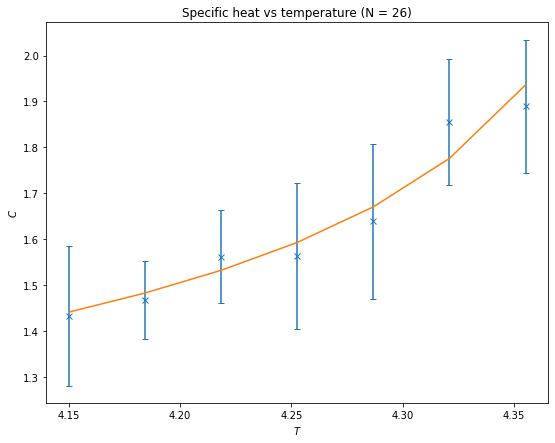

In [39]:
max = np.argmax(Cs)
T_c = Ts[max]
s = slice(0, max-1)
T_range = np.abs(Ts[s] - T_c)
C_range = Cs[s]
C_err_range = C_errs[s]/2

bounds_gamma = ([-1, -5], [0.5, 20])
fit, fit_err = curve_fit(power_sing, T_range, C_range, bounds=bounds_gamma, sigma=C_err_range)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(-T_range+T_c, C_range, C_err_range, capsize=3, fmt='x')
C_pred = power_sing(T_range, gamma, a)
ax.plot(-T_range+T_c, C_pred)

ax.set_title("Specific heat vs temperature ("+ f'{N = }' + ")")
ax.set_xlabel("$T$")
ax.set_ylabel("$C$")
fig.set_size_inches(9, 7)

[-0.21267096  0.08795583]
0.02235495863742025


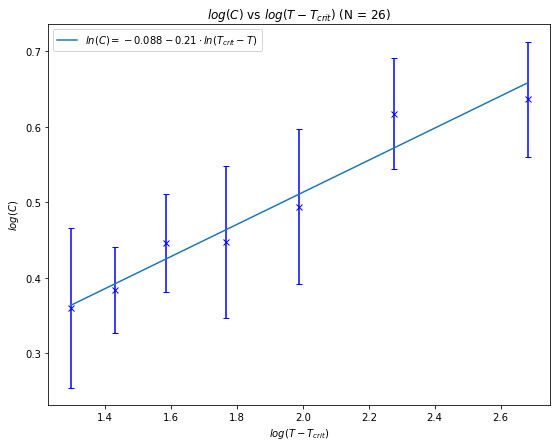

In [87]:
max = np.argmax(Cs)
T_c = Ts[max]
s = slice(0, max-1)
T_range = np.abs(Ts[s] - T_c)
T_log = np.log(T_range)
C_log = np.log(Cs[s])
C_log_err = C_errs[s]/Cs[s]/2

bounds_gamma = ([-1, -5], [0.5, 20])
fit, fit_err = curve_fit(lin_fit, T_log, C_log, bounds=bounds_gamma)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(-T_log, C_log, C_log_err, capsize=3, fmt='bx')
C_pred = lin_fit(T_log, gamma, a)
ax.plot(-T_log, C_pred)

ax.set_title("$log(C)$ vs $log(T-T_{crit})$ ("+ f'{N = }' + ")")
ax.set_xlabel("$log(T - T_{crit})$")
ax.set_ylabel("$log(C)$")
fig.set_size_inches(9, 7)
ax.legend(["$ln(C) = -0.088 - 0.21\cdot ln(T_{crit} - T)$"])
plt.savefig(r"Pics/alpha3d.png", format="png", dpi=1200)

# Magnetisation

[4.51992021 0.31759045 0.94837373]
0.00207674259597907
0.007606306711045056


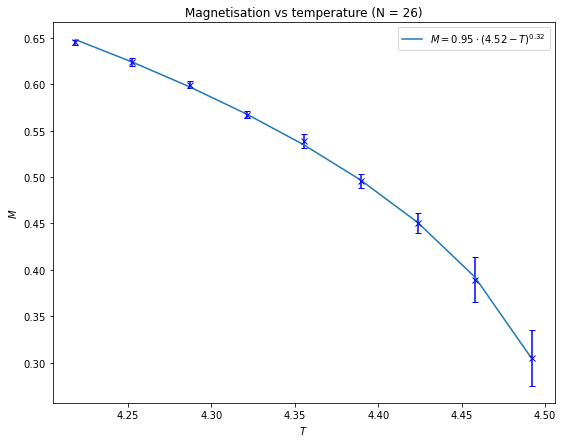

In [95]:
s = slice(2, -9)
T_range = Ts[s]
M_range = Ms[s]
M_err_range = M_errs[s]

bounds_gamma = ([4, 0, 0], [5, 1, 10])
fit, fit_err = curve_fit(M_exp, T_range, M_range, bounds=bounds_gamma)

print(fit)
print(np.sqrt(fit_err[0][0]))
print(np.sqrt(fit_err[1][1]))

[T_c, beta, a] = fit
fig, ax = plt.subplots()
ax.errorbar(T_range, M_range, M_err_range, capsize=3, fmt='bx')
M_pred = M_exp(T_range, T_c, beta, a)
ax.plot(T_range, M_pred)

ax.set_title("Magnetisation vs temperature ("+ f'{N = }' + ")")
ax.set_xlabel("$T$")
ax.set_ylabel("$M$")
fig.set_size_inches(9, 7)

ax.legend(["$M = 0.95\cdot(4.52 - T)^{0.32}$"])
plt.savefig(r"Pics/beta3d.png", format="png", dpi=1200)

In [75]:
K = 10
n = 200
H_min = 0.005
H_max = 0.3
H_steps = 20
Hs = np.geomspace(H_min, H_max, H_steps)
T_c = 4.52

bounds_alpha0 = ([2.26, 1, -10, -10], [2.4, 2, 10, 10])
bounds_alpha = ([0, 0], [0.3, 10])

l = Lattice(26, K=K, d=3)
Ms_0, M_errs_0 = [], []
for H in Hs:
    stat, err = l.stats(n, T_c, H=H, t0=100)
    Ms_0.append(stat[0]), M_errs_0.append(err[0])
[alpha, _], err = curve_fit(power_sing, Hs, Ms_0, bounds=bounds_alpha, sigma=M_errs_0)
alpha_err = np.sqrt(err[0,0])

print("alpha = " + str(alpha) + " +/- " + str(alpha_err))
print("delta = " + str(1/alpha) + " +/- " + str(alpha_err/alpha**2))

alpha = 0.18595437996312728 +/- 0.001858571561706337
delta = 5.377663060145661 +/- 0.05374851420013476


a = 0.9687545421543478 +/- 0.010674837917575994
alpha = 0.21115251079445363 +/- 0.003052676805129328
delta = 4.735913374828158 +/- 0.06846810798528959


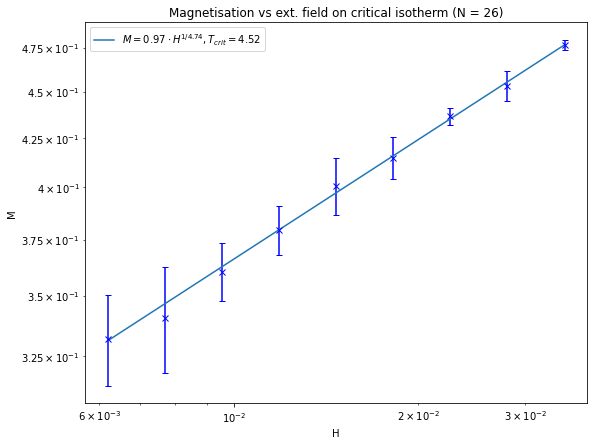

In [84]:
s = slice(1, -10)
H_range=Hs[s]
Ms=Ms_0[s]
M_errs=M_errs_0[s]


bounds_alpha = ([0, 0], [0.3, 10])
[alpha, a], err = curve_fit(power_sing, H_range, Ms, bounds=bounds_alpha, sigma=M_errs)
alpha_err = np.sqrt(err[0,0])
a_err = np.sqrt(err[1,1])

print(f'{a = } +/- {a_err}')
print("alpha = " + str(alpha) + " +/- " + str(alpha_err))
print("delta = " + str(1/alpha) + " +/- " + str(alpha_err/alpha**2))

fig, ax = plt.subplots()
ax.errorbar(H_range, Ms, M_errs, capsize=3, fmt="bx")
ax.plot(H_range, power_sing(H_range, alpha, a))
ax.set_title("Magnetisation vs ext. field on critical isotherm (N = 26)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("H")
ax.set_ylabel("M")

ax.legend(["$M = 0.97\cdot H^{1/4.74},  T_{crit} = 4.52$"])
fig.set_size_inches(9, 7)
plt.savefig(r"Pics/delta3d.png", format="png", dpi=1200, bbox_inches='tight')